<center>
    <h1> 
        Realce por subtração de imagens
    </h1>
</center>
    <div style="text-align: right;"><h3>
        Carlos Eduardo Cassimiro da Silva
    </h3></div>

<center>
    <h4>Reprodução da figura 2.27 do livro Processamento Digital de Imagens (Gonzalez, Rafael C.)</h4>
</center>

##### Roteiro
1. Imagem Original <br>
 1.1 Zerando o bit menos significativo <br>
 1.2 Subtração 
2. Imagem Retirada do Livro <br>
 2.1 Zerando o bit menos significativo <br>
 2.2 Subtração <br>
 
 ##### Fonte da imagem
 DIP3E_CH02_Original_Images.zip <br>
 http://www.imageprocessingplace.com/DIP-3E/dip3e_book_images_downloads.htm

#### Módulos utilizados

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## 1 Imagem Original

#### Imagem Original

In [8]:
image = cv2.imread('imagens_originais/Fig0227(a)(washington_infrared).tif')

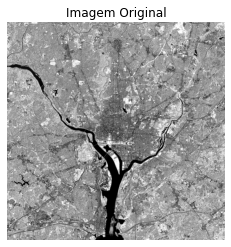

In [9]:
plt.title('Imagem Original')
plt.imshow(image)
plt.axis('off')
plt.show();

### 1.1 Zerando o bit menos significativo

Para zerar o bit menos significativo, optei por fazer uma operação bitwise(AND) entre os valores RGB de cada pixel com outro um outro valor de referência para funcionar como uma espécie de "máscara". Como o objetivo é zerar o bit menos significativo, basta realizar uma operação x AND 0 nesse bit, pois o resultado sempre será 0, e para não motidificar os outros valores basta colocar 1. Nesse perspectiva, primeiro encontrei o valor na base 10 dessa "máscara":

In [5]:
int('11111110',2)

254

In [10]:
bin(151)

'0b10010111'

In [11]:
151 & 254

150

Como é possível ver, depois de realizar a operação de bitwise, somemente o bit menos significativo foi alterado.

In [23]:
bin(150)

'0b10010110'

Agora em todos os valores do vetor:

In [12]:
image_reset_lsb = image & 254

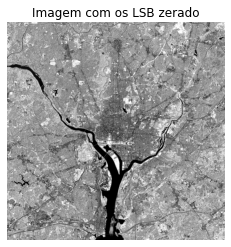

In [13]:
# LSB = Less Significant Bit
plt.title('Imagem com os LSB zerado')
plt.imshow(image_reset_lsb)
plt.axis('off')
plt.show();

### 1.2 Subtração

In [14]:
image_sub = image_reset_lsb - image

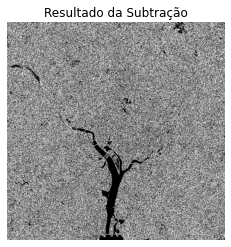

In [15]:
plt.title('Resultado da Subtração')
plt.imshow(image_sub)
plt.axis('off')
plt.show();

Apesar do resultado da subtração fazer um destaque de certas partes da figura, ele ainda não realça as partes menos visíveis como no livro, então tentarei novamente com um print da imagem do livro.

## 2 Imagem Retirada do Livro

In [16]:
image = cv2.imread('imagens_originais/Fig0227(a)(washington_infrared)_printed.png')

Apesar de visualmente ter somente tons de cinza na imagem, no seu vetor correspondente os valores RGB de cada pixel contém algumas variações que mudam totalmente o resultado. Então faz-se necessário colocar os valores em média:

In [17]:
x,y, _ = image.shape
for i in range(x):
    for j in range(y):
        mean = (sum(image[i][j]))//3
        image[i][j] = [mean, mean, mean]

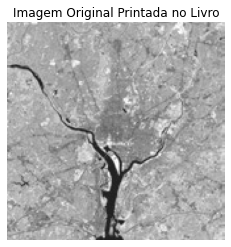

In [18]:
plt.title('Imagem Original Printada no Livro')
plt.imshow(image)
plt.axis('off')
plt.show();

### 2.1 Zerando o bit menos significativo

In [19]:
image_reset_lsb = image & 254

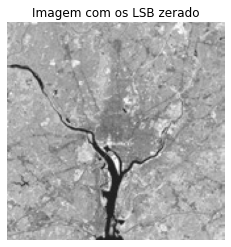

In [20]:
# LSB = Less Significant Bit
plt.title('Imagem com os LSB zerado')
plt.imshow(image_reset_lsb)
plt.axis('off')
plt.show();

### 2.2 Subtração

In [21]:
image_sub = image_reset_lsb - image

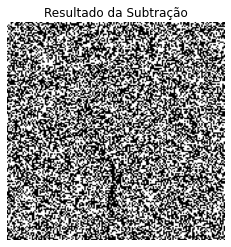

In [22]:
plt.title('Resultado da Subtração')
plt.imshow(image_sub)
plt.axis('off')
plt.show();

Como podemos ver, como a imagem retirada do livro o resultado é até pior que o anterior. Não foi possível obter os resultados ilustrados no livro.